# Final Project: Pima Diabetes Predictor

**Course Code:** AI 216  
**Project Title:** Pima Diabetes Predictor using Machine Learning  

---

This project implements a Machine Learning pipeline to predict diabetes using the Pima Indians Diabetes dataset. 
It covers data handling, visualization, model training (KNN & Decision Trees), and evaluation.

### Step 1: Setup & Data Loading
- Importing necessary libraries.
- Loading the dataset from the provided URL.
- Adding headers to the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Configure visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Read CSV (header=None because the raw file has no headers)
df = pd.read_csv(url, names=column_names)

print("Data Loaded Successfully!")

Data Loaded Successfully!


### Step 2: Data Preprocessing
- Checking for missing values.
- Handling '0' values in columns like 'Glucose' and 'BloodPressure' which are biologically impossible.
- Replacing invalid zeros with the column mean.

In [2]:
# Display statistical summary before cleaning
print("Summary before cleaning (Note min value 0 in Glucose/BP):")
print(df[['Glucose', 'BloodPressure']].describe())

# Columns where 0 is invalid
invalid_zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 with NaN first to correctly calculate mean (ignoring 0s)
for col in invalid_zero_cols:
    df[col] = df[col].replace(0, np.nan)
    mean_val = df[col].mean()
    df[col] = df[col].fillna(mean_val)
    print(f"Replaced missing values in '{col}' with mean: {mean_val:.2f}")

# Display first 5 rows and summary after cleaning
print("\nFirst 5 rows of data:")
print(df.head())

print("\nStatistical Summary (After Cleaning):")
print(df.describe())

Summary before cleaning (Note min value 0 in Glucose/BP):
          Glucose  BloodPressure
count  768.000000     768.000000
mean   120.894531      69.105469
std     31.972618      19.355807
min      0.000000       0.000000
25%     99.000000      62.000000
50%    117.000000      72.000000
75%    140.250000      80.000000
max    199.000000     122.000000
Replaced missing values in 'Glucose' with mean: 121.69
Replaced missing values in 'BloodPressure' with mean: 72.41
Replaced missing values in 'SkinThickness' with mean: 29.15
Replaced missing values in 'Insulin' with mean: 155.55
Replaced missing values in 'BMI' with mean: 32.46

First 5 rows of data:
   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0    

### Step 3: Exploratory Data Analysis (EDA)
- Correlation Heatmap: To understand feature relationships.
- Histogram: To visualize Age distribution.
- Pairplot: To see pairwise relationships.

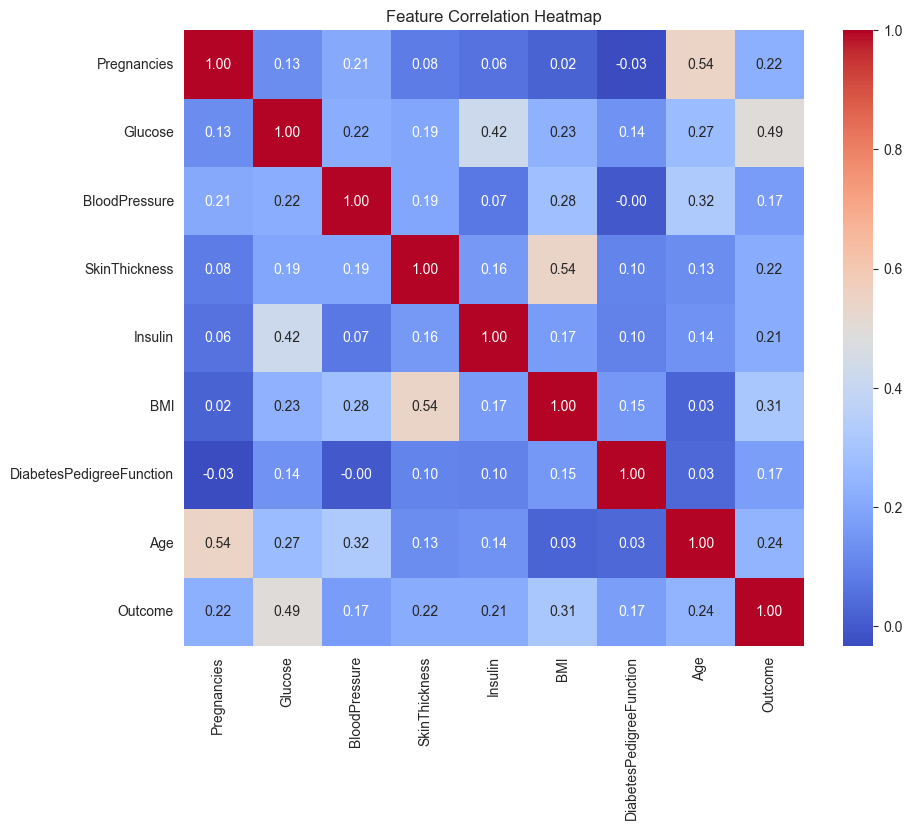

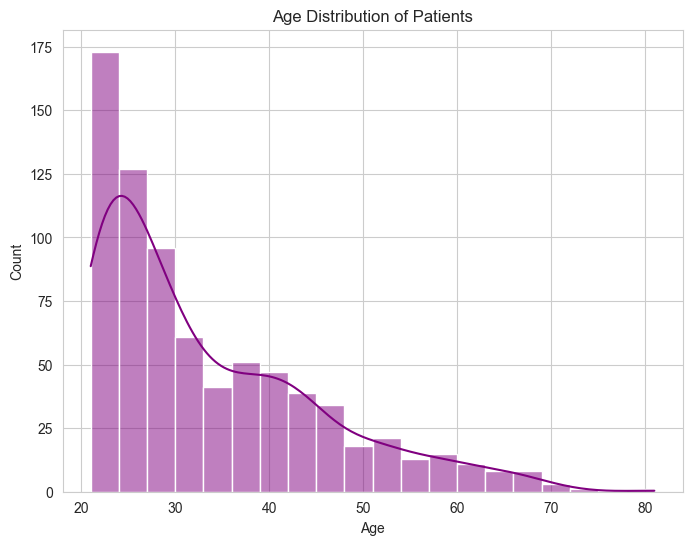

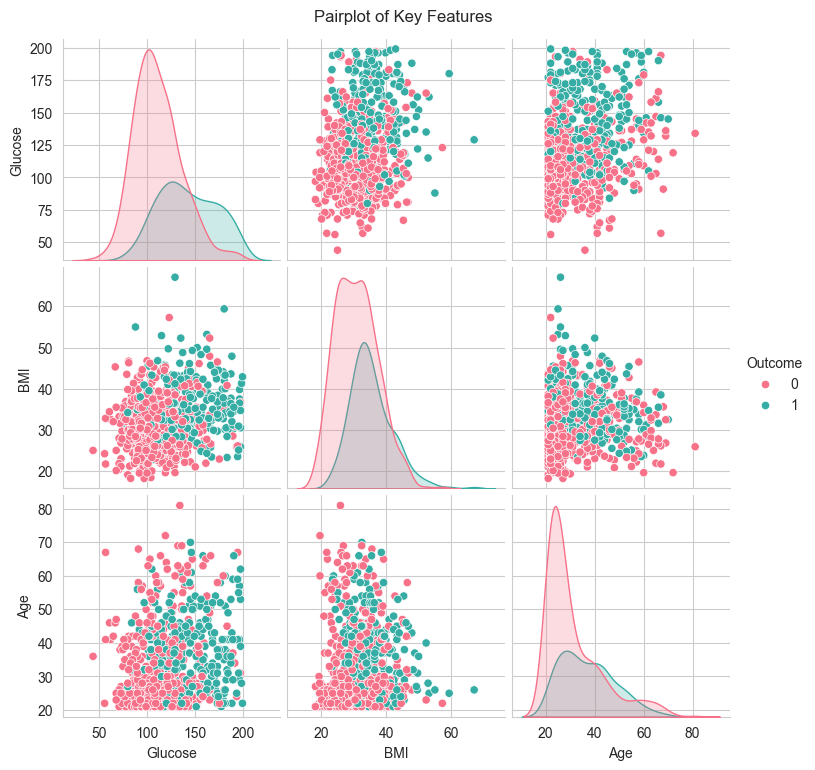

In [3]:
# 1. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 2. Histogram for Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 3. Pairplot (visualizing relationships with Outcome)
sns.pairplot(df, hue='Outcome', vars=['Glucose', 'BMI', 'Age'], palette='husl')
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

### Step 4: Machine Learning Implementation
- Splitting data into Features (X) and Target (y).
- Splitting into Training (80%) and Testing (20%) sets.
- Training K-Nearest Neighbors (KNN) and Decision Tree models.

In [4]:
# Define Features (X) and Target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Initialize models
knn_model = KNeighborsClassifier(n_neighbors=7)
dt_model = DecisionTreeClassifier(random_state=42)

# Train models
knn_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

print("Models Trained Successfully!")

Training set shape: (614, 8)
Testing set shape: (154, 8)
Models Trained Successfully!


### Step 5: Evaluation
- Comparing Accuracy Scores.
- Displaying Confusion Matrix for the best model.

KNN Accuracy: 65.58%
Decision Tree Accuracy: 72.08%

Winning Model: Decision Tree


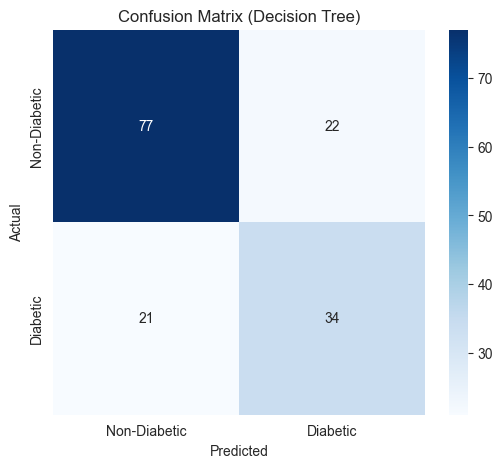

In [5]:
# Predictions
knn_pred = knn_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

# Calculate Accuracy
knn_acc = accuracy_score(y_test, knn_pred)
dt_acc = accuracy_score(y_test, dt_pred)

print(f"KNN Accuracy: {knn_acc * 100:.2f}%")
print(f"Decision Tree Accuracy: {dt_acc * 100:.2f}%")

# Compare performance
best_model_name = ""
best_model = None

if knn_acc > dt_acc:
    best_model_name = "K-Nearest Neighbors"
    best_model = knn_model
    best_pred = knn_pred
    print(f"\nWinning Model: {best_model_name}")
else:
    best_model_name = "Decision Tree"
    best_model = dt_model
    best_pred = dt_pred
    print(f"\nWinning Model: {best_model_name}")

# Confusion Matrix for the best model
cm = confusion_matrix(y_test, best_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title(f"Confusion Matrix ({best_model_name})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Step 6: Prediction System
- Testing the model with a sample patient data.
- Input: [6, 148, 92, 35, 0, 33.6, 0.627, 50]

In [ ]:
# Dummy patient data
# Note: Since we imputed missing values (like Insulin) with mean during training, 
# strictly speaking, we might need to preprocess this input similarly if it contains 0s where invalid.
# However, for this simple check, we will pass it as provided.

patient_data = np.array([[6, 148, 92, 35, 0, 33.6, 0.627, 50]])

# Feature columns used for training
# ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

prediction = best_model.predict(patient_data)

print("\n--- New Patient Prediction ---")
print(f"Input Data: {patient_data[0]}")

if prediction[0] == 1:
    print("Prediction: Diabetic")
else:
    print("Prediction: Not Diabetic")


--- New Patient Prediction ---
Input Data: [  6.    148.     92.     35.      0.     33.6     0.627  50.   ]
Prediction: Diabetic


C:\Users\arsal\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
